In [209]:
#voy a probar varias cosas:
#1: bajar un archivo grib desde un ftp
#2: abrir ese archivo grib y tratar de graficarlo

#importo la libreria urllib
import ftplib
import mpl_toolkits.basemap as bm  # import Basemap matplotlib toolkit
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [214]:
ruta = 'ftp.cpc.ncep.noaa.gov/NMME/clim/tmp2m.01.CFSv2.clim.1x1.grb'
urllib.request.urlretrieve(ruta,grib_file)
#print(grib_file)


HTTPError: HTTP Error 404: Not Found

In [208]:
#para trabajar con archivos grib
import pygrib

#grib_file = 'tmp2m.12.CFSv2.clim.1x1.grb'

grbs=pygrib.open(grib_file)

for grb in grbs:
    print (grb)


1:2 metre temperature:K (avg):regular_ll:heightAboveGround:level 2:fcst time 0-720 months (avg):from 198212010000
2:2 metre temperature:K (avg):regular_ll:heightAboveGround:level 2:fcst time 720-1440 months (avg):from 198212010000
3:2 metre temperature:K (avg):regular_ll:heightAboveGround:level 2:fcst time 1440-2160 months (avg):from 198212010000
4:2 metre temperature:K (avg):regular_ll:heightAboveGround:level 2:fcst time 2160-2880 months (avg):from 198212010000
5:2 metre temperature:K (avg):regular_ll:heightAboveGround:level 2:fcst time 2880-3600 months (avg):from 198212010000
6:2 metre temperature:K (avg):regular_ll:heightAboveGround:level 2:fcst time 3600-4320 months (avg):from 198212010000
7:2 metre temperature:K (avg):regular_ll:heightAboveGround:level 2:fcst time 4320-5040 months (avg):from 198212010000
8:2 metre temperature:K (avg):regular_ll:heightAboveGround:level 2:fcst time 5040-5760 months (avg):from 198212010000
9:2 metre temperature:K (avg):regular_ll:heightAboveGround:le

In [187]:
grbs.rewind() # rewind the iterator
t2mens = []
i_month = 1
e_month = 3

for grb in grbs[1:4]:
    print(grb.messagenumber)
#    if grb.validDate == date_valid and grb.parameterName == 'Temperature' and grb.level == 2: 
    t2mens.append(grb.values)#t2mens = np.array(t2mens)
t2mens = np.array(t2mens)
t2mens=np.mean(t2mens,0)
#print t2mens.shape, t2mens.min(), t2mens.max()
lats, lons = grb.latlons()  # get the lats and lons for the grid.
lats = lats[:,1]
lons = lons[1,:]
print(t2mens.shape)
#print 'min/max lat and lon',lats.min(), lats.max(), lons.min(), lons.max()

2
3
4
(181, 360)


(181, 360)
(181, 360)


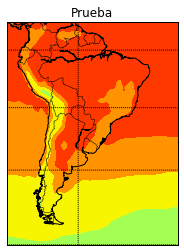

In [188]:
mapproj = bm.Basemap(llcrnrlon = 360-85,llcrnrlat = -60, urcrnrlon = 360-25,
           urcrnrlat = 10 , projection = 'mill', area_thresh =10000 ,
           resolution='l')

mapproj.drawcoastlines()
mapproj.drawcountries()
mapproj.drawparallels(np.array([-60, -40, -20, 0]))#, labels=[1,0,0,0])
mapproj.drawmeridians(np.arange(0,360,60))#, labels=[0,0,0,1])

lonall, latall = np.meshgrid(lons, lats)
lonproj, latproj = mapproj(lonall, latall)
#print(lonproj.shape)
#print(latproj.shape)
cs = plt.contourf(lonproj,latproj,t2mens[:,:],10)
t = plt.title('Prueba')
plt.show()

[   0.    1.    2.    3.    4.    5.    6.    7.    8.    9.   10.   11.
   12.   13.   14.   15.   16.   17.   18.   19.   20.   21.   22.   23.
   24.   25.   26.   27.   28.   29.   30.   31.   32.   33.   34.   35.
   36.   37.   38.   39.   40.   41.   42.   43.   44.   45.   46.   47.
   48.   49.   50.   51.   52.   53.   54.   55.   56.   57.   58.   59.
   60.   61.   62.   63.   64.   65.   66.   67.   68.   69.   70.   71.
   72.   73.   74.   75.   76.   77.   78.   79.   80.   81.   82.   83.
   84.   85.   86.   87.   88.   89.   90.   91.   92.   93.   94.   95.
   96.   97.   98.   99.  100.  101.  102.  103.  104.  105.  106.  107.
  108.  109.  110.  111.  112.  113.  114.  115.  116.  117.  118.  119.
  120.  121.  122.  123.  124.  125.  126.  127.  128.  129.  130.  131.
  132.  133.  134.  135.  136.  137.  138.  139.  140.  141.  142.  143.
  144.  145.  146.  147.  148.  149.  150.  151.  152.  153.  154.  155.
  156.  157.  158.  159.  160.  161.  162.  163.  1